In [20]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from time import time
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [21]:
#Loading the dataset
def load_data():
    faces = fetch_lfw_people(min_faces_per_person=60)
    print('data loaded')
    print(faces.target_names)
    # introspect the images arrays to find the shapes (for plotting)
    n_samples= faces.images.shape 
    print(n_samples)
    return faces

In [22]:
#Running the load_data function and getting the target names with shape of images
faces = load_data()
faces


data loaded
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


{'data': array([[138.       , 135.66667  , 127.666664 , ...,   1.6666666,
           1.6666666,   0.6666667],
        [ 71.       ,  56.333332 ,  67.666664 , ..., 247.66667  ,
         243.       , 238.33333  ],
        [ 84.666664 ,  97.333336 ,  72.666664 , ..., 114.333336 ,
         194.33333  , 241.       ],
        ...,
        [ 29.333334 ,  28.666666 ,  29.333334 , ..., 145.33333  ,
         147.       , 141.66667  ],
        [ 49.       ,  55.333332 ,  76.333336 , ..., 186.       ,
         176.       , 160.66667  ],
        [ 31.       ,  26.333334 ,  28.333334 , ...,  34.       ,
          42.       ,  69.666664 ]], dtype=float32),
 'images': array([[[138.       , 135.66667  , 127.666664 , ...,  69.       ,
           68.333336 ,  67.333336 ],
         [146.       , 139.33333  , 125.       , ...,  68.333336 ,
           68.       ,  67.333336 ],
         [150.       , 138.33333  , 124.333336 , ...,  68.333336 ,
           67.333336 ,  66.666664 ],
         ...,
         [153.

In [23]:
#Separating the data part and the features in variables 
X = faces.data
n_features = X.shape[1]
n_samples,h,w= faces.images.shape

# the label to predict is the id of the person
y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1348
n_features: 2914
n_classes: 8


In [24]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
#Crearting a pipeline for SVC using RandomizedPCA

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
#train_pca = pca.transform(X_train)
#test_pca = pca.transform(X_test)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [26]:
# Train a SVM classification model
print("Fitting the classifier to the training set")
t0 = time()
param_grid= {'svc__C': [1,5,10,15,50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf =  GridSearchCV(model,param_grid)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
model = clf.best_estimator_
print("Best parameters found by grid search:")
print(clf.best_params_)

Fitting the classifier to the training set
done in 84.040s
Best parameters found by grid search:
{'svc__C': 10, 'svc__gamma': 0.001}


In [27]:
# Quantitative evaluation of the model quality on the test set
print("Predicting people's names on the test set")
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=faces.target_names))


Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



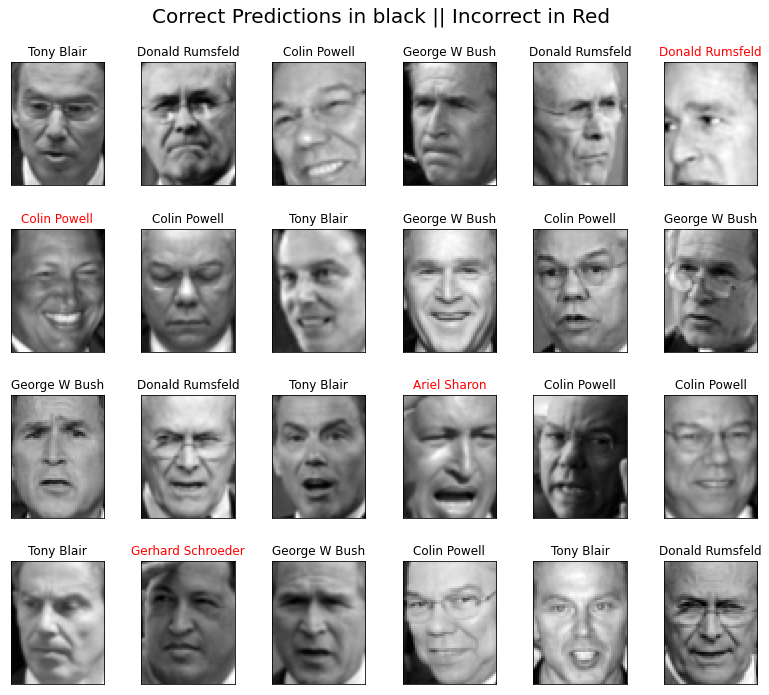

In [29]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images,titles_pred,labels_actual, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    fig = plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        ax = plt.subplot(n_row, n_col, i + 1)
        ax.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        fc = 'black'
        if titles_pred[i]!=labels_actual[i]:
          fc = 'red'
        title = "Predicted:" +titles_pred[i] + "\nActual:" + labels_actual[i] 
        plt.title(titles_pred[i], size=12,color=fc)
        plt.xticks(())
        plt.yticks(())
    fig.suptitle("Correct Predictions in black || Incorrect in Red "+'\n', fontsize=20)
    plt.show()

sample = np.random.choice(X_test.shape[0], size=24, replace=False)
images = X_test[sample]
labels_actual = y_test[sample]
labels_pred_sample = y_pred[sample]
names_pred = target_names[labels_pred_sample]
names_actual = target_names[labels_actual]

plot_gallery(images, names_pred, names_actual, h, w, n_row=4, n_col=6)


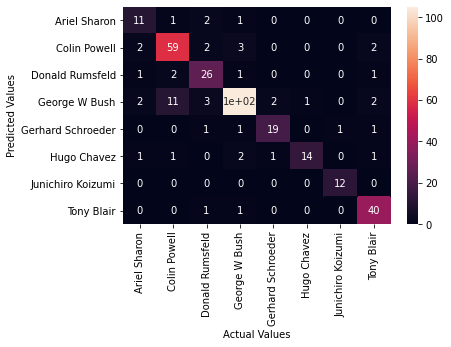

In [30]:
#Plotting the Confusion Matrix and Creating a heatmap

def heatmap(cmap):
  sns.heatmap(cmap,annot=True,xticklabels=target_names,yticklabels=target_names)
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.show(block = True)

cmap = confusion_matrix(y_test, y_pred, labels=range(n_classes))
heatmap(cmap)
